In [174]:
# libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer

from scipy.stats import kurtosis, skew

In [175]:
path = 'boston_fixed.csv'
df = pd.read_csv(path, index_col = 0)
df.head()

,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
178,Arlington,29,3567,-77.098798,38.872313,29.9,29.9,0.06642,0.0,4.05,0,0.51,6.860,74.4,2.9153,5,296,16.6,391.27,6.92
177,Arlington,29,3566,-77.097298,38.875713,24.6,24.6,0.05425,0.0,4.05,0,0.51,6.315,73.4,3.3175,5,296,16.6,395.60,6.29
176,Arlington,29,3565,-77.095098,38.878213,23.2,23.2,0.07022,0.0,4.05,0,0.51,6.020,47.2,3.5549,5,296,16.6,393.23,10.11
175,Arlington,29,3564,-77.105798,38.888213,29.4,29.4,0.06664,0.0,4.05,0,0.51,6.546,33.1,3.1323,5,296,16.6,390.96,5.33
174,Arlington,29,3563,-77.124298,38.885713,22.6,22.6,0.08447,0.0,4.05,0,0.51,5.859,68.7,2.7019,5,296,16.6,393.23,9.64


In [176]:
X_cols = ['CMEDV', 'CRIM', 'INDUS', 'AGE', 'DIS', 'LSTAT', 'RAD']
y_col = ['NOX']

In [177]:
X = df[X_cols]
y = df[y_col]

In [178]:
X.head()

,CMEDV,CRIM,INDUS,AGE,DIS,LSTAT,RAD
178,29.9,0.06642,4.05,74.4,2.9153,6.92,5
177,24.6,0.05425,4.05,73.4,3.3175,6.29,5
176,23.2,0.07022,4.05,47.2,3.5549,10.11,5
175,29.4,0.06664,4.05,33.1,3.1323,5.33,5
174,22.6,0.08447,4.05,68.7,2.7019,9.64,5


In [179]:
y.head()

,NOX
178,0.51
177,0.51
176,0.51
175,0.51
174,0.51


In [180]:
def plotting(x, activation = None, normalization = None, **kwargs):
    x_cols = x.columns
    x = np.asarray(x)

    if activation:
        x = activation(x, **kwargs)
        activation = activation.__name__.upper()
    else:
        activation = 'NONE'
        
        
    if normalization:
        x = normalization().fit_transform(x)
        normalization = normalization.__name__.upper()
    else:
        normalization = 'NONE'
        
        
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    fig.suptitle(('The distribution of the data with {} normalization for an activation'
                  ' function of {}'.format(normalization ,activation)), fontsize=16)
    
    for i in range(x.shape[1]):
        ax[0].hist(x[:,i], alpha = 0.2)
    ax[0].legend(x_cols)   
    ax[1] = sns.boxplot(data = x)
    plt.xticks(rotation=15)
    plt.show()
    print(kurtosis(x))
    print(skew(x))
    return x

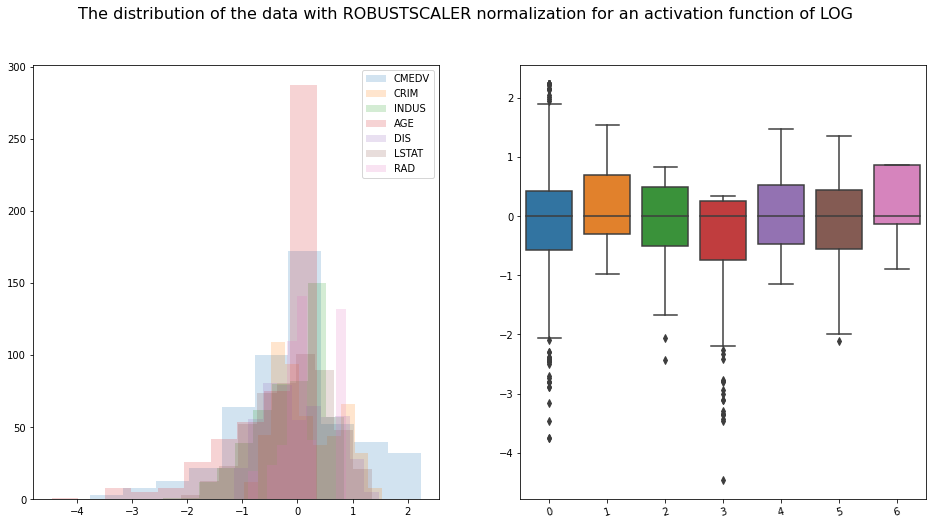

[ 0.80780774 -1.01158216 -0.29536749  2.90733209 -0.98832465 -0.43905903
 -0.63565534]
[-0.33423126  0.40473014 -0.64121763 -1.67068359  0.152277   -0.31928227
  0.28576674]


,CMEDV,CRIM,INDUS,AGE,DIS,LSTAT,RAD
0,0.895004,-0.355313,-0.698361,-0.055394,-0.105598,-0.555800,0.0
1,0.387160,-0.408539,-0.698361,-0.073758,0.037306,-0.662832,0.0
2,0.234649,-0.340682,-0.698361,-0.672951,0.113729,-0.130710,0.0
3,0.851111,-0.354444,-0.698361,-1.154526,-0.026212,-0.848528,0.0
4,0.166448,-0.292094,-0.698361,-0.163563,-0.189653,-0.184088,0.0


In [181]:

def root(x, power, inverse = False):
    return x ** power if not inverse else x ** 1/power


def log(x, inverse = False):
    return np.log(x) if not inverse else np.exp(x)

X = plotting(X, activation = log , normalization = RobustScaler)
X = pd.DataFrame(data = X)
X.columns = X_cols
X.head()

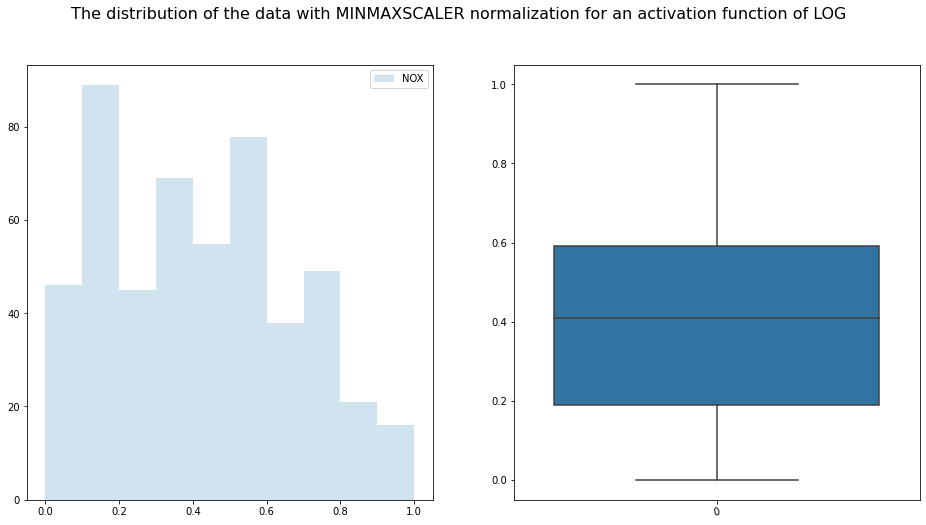

[-0.73255331]
[0.35671812]


,NOX
0,0.3444
1,0.3444
2,0.3444
3,0.3444
4,0.3444


In [182]:
y = plotting(y, activation = log , normalization = MinMaxScaler)
y = pd.DataFrame(data = y)
y.columns = y_col
y.head()

In [183]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

/Users/yousefnami/opt/anaconda3/envs/ai_hack_2021/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


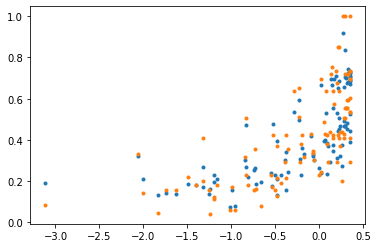

In [210]:
model = SVR(kernel = 'rbf', C = 1)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
plt.plot(X_test['AGE'],y_hat, '.')
plt.plot(X_test['AGE'],y_test, '.')

r2_score(y_test, y_hat)
#stats.probplot([y_t[0] - y_h for y_t,y_h in zip(y_test, y_hat)], plot = plt)
import pickle
pickle.dump(model, open('SVR.pkl', 'wb'))

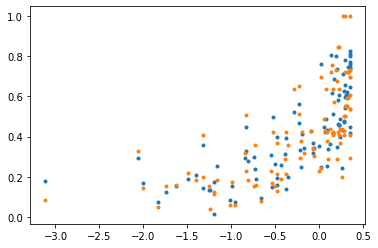

In [207]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
r2_score(y_test, y_hat)
plt.plot(X_test['AGE'],y_hat, '.')
plt.plot(X_test['AGE'],y_test, '.')

from scipy import stats
#stats.probplot([y_t[0] - y_h[0] for y_t,y_h in zip(y_test, y_hat)], plot = plt)

In [186]:
from statsmodels.graphics.gofplots import qqplot

In [187]:
y_test = np.asarray(y_test)
SS_Residual = sum((y_test-y_hat)**2) 

SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [188]:
print(adjusted_r_squared)

[0.7794787]


In [123]:
import scipy

    
scipy.stats.norm.pdf(6,2.0,1.0)

print( np.log(scipy.stats.norm.pdf(data,2.0,1.0)).sum() )

x = np.linspace(-10, 10, 1000, endpoint=True)

y = []
for i in x:
    y.append(np.log(scipy.stats.norm.pdf(data,i,0.5)).sum())

plt.plot(x,y)

plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')

plt.grid()

plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()

NameError: name 'data' is not defined

In [125]:
np.random.normal(size = (3,3))

array([[ 2.23595779, -0.00546796, -0.33663176],
       [-0.57210619, -0.63439954, -0.33783818],
       [ 0.13699804,  0.54546788,  1.10103333]])

In [131]:
x = np.linspace(0, 5, 10, endpoint=False)
scipy.stats.multivariate_normal.pdf(x)

array([3.98942280e-01, 3.52065327e-01, 2.41970725e-01, 1.29517596e-01,
       5.39909665e-02, 1.75283005e-02, 4.43184841e-03, 8.72682695e-04,
       1.33830226e-04, 1.59837411e-05])

In [208]:
from sklearn.utils import resample
boot_strapped = resample()